In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
plt.style.use('default')

In [2]:
x = np.linspace(-1,1,50)
y_train = np.cos(2*x)
print(x, y_train)

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ] [-0.41614684 -0.34061508 -0.26281476 -0.18326405 -0.10249276 -0.02103886
  0.06055518  0.1417459   0.22199256  0.30076072  0.37752575  0.45177639
  0.52301811  0.59077643  0.65460007  0.71406394  0.76877202  0.81835992
  0.8624974   0.90089048  0.93328345  0.95946058  0.97924752  0.99251249
  0.99916713  0.99916713  0.99251249  0.97924752  0.95946058  0.93328345
  0.90089048  0.8624974  

In [3]:
x = np.asarray(x, np.float32)
y_train = np.asarray(y_train, np.float32)

In [4]:
def loss(a3, a2, a1, a0):
  y_hat = a3*x**3 + a2*x**2 + a1*x + a0
  return tf.reduce_mean((y_hat - y_train)**2)

In [5]:
a0 = tf.Variable(0.8)
a1 = tf.Variable(0.1)
a2 = tf.Variable(-0.99)
a3 = tf.Variable(-0.13)
loss(a3, a2, a1, a0)


<tf.Tensor: shape=(), dtype=float32, numpy=0.025186574>

In [6]:
with tf.GradientTape() as tape:
  loss_val = loss(a3, a2, a1, a0)
  print("Loss at ", loss_val)
grad_a3, grad_a2, grad_a1, grad_a0 = tape.gradient(loss_val, [a3, a2, a1, a0])
print(grad_a3, grad_a2, grad_a1, grad_a0)

Loss at  tf.Tensor(0.025186574, shape=(), dtype=float32)
tf.Tensor(0.0014967062, shape=(), dtype=float32) tf.Tensor(0.10598008, shape=(), dtype=float32) tf.Tensor(0.013086289, shape=(), dtype=float32) tf.Tensor(0.03909055, shape=(), dtype=float32)


In [7]:
a0 = tf.Variable( 0.79626507)
a1 = tf.Variable(0.09236504)
a2 = tf.Variable(-1.0556233)
a3 = tf.Variable(-0.1297582)
eta = 0.00001
start= time()

for i in range(10000):
  with tf.GradientTape() as tape:
    y_hat = a3*x**3 + a2*x**2 + a1*x + a0
    loss = tf.reduce_mean((y_hat - y_train)**2)
  grad_a3, grad_a2, grad_a1, grad_a0 = tape.gradient(loss, [a3, a2, a1, a0])
  a3 = tf.Variable(a3 - eta * grad_a3)
  a2 = tf.Variable(a2 - eta * grad_a2)
  a1 = tf.Variable(a1 - eta * grad_a1)
  a0 = tf.Variable(a0 - eta * grad_a0)
  if (i % 1000 == 0):
      t = time() - start
      print("Epoch:",i, "a3=",a3.numpy(),"a2=",a2.numpy(), "a1=",a1.numpy(),"a0=",a0.numpy(),"gradient_a3", grad_a3.numpy(), "gradient_a2",grad_a2.numpy(), "gradient_a1", grad_a1.numpy(), "gradient_a0",grad_a0.numpy(),"mse=", loss.numpy(), "time for 1000 epochs ", t/5.)
      start = time()

Epoch: 0 a3= -0.12975818 a2= -1.055624 a1= 0.09236496 a0= 0.7962652 gradient_a3 -0.0017321426 gradient_a2 0.07496782 gradient_a1 0.007893275 gradient_a0 -0.013913866 mse= 0.019122243 time for 1000 epochs  0.0007682323455810546
Epoch: 1000 a3= -0.12974328 a2= -1.0563393 a1= 0.092283 a0= 0.7963844 gradient_a3 -0.0017628409 gradient_a2 0.07474077 gradient_a1 0.007842865 gradient_a0 -0.0141717475 mse= 0.019066358 time for 1000 epochs  1.9815481185913086
Epoch: 2000 a3= -0.12972838 a2= -1.0570545 a1= 0.092205584 a0= 0.7965036 gradient_a3 -0.001791589 gradient_a2 0.0745137 gradient_a1 0.007795587 gradient_a0 -0.014429627 mse= 0.019010644 time for 1000 epochs  2.045592164993286
Epoch: 3000 a3= -0.12971348 a2= -1.0577698 a1= 0.09213108 a0= 0.7966228 gradient_a3 -0.0018190602 gradient_a2 0.074286655 gradient_a1 0.007750343 gradient_a0 -0.014687514 mse= 0.018955087 time for 1000 epochs  2.130801200866699
Epoch: 4000 a3= -0.12969857 a2= -1.058485 a1= 0.09205657 a0= 0.7967523 gradient_a3 -0.001846

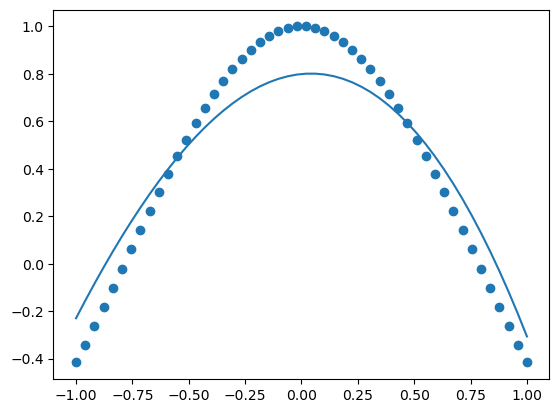

In [8]:
plt.plot(x,a3*x**3 + a2*x**2 + a1*x + a0)
plt.scatter(x,y_train)